In [ ]:
!pwd

/content


In [38]:
!ls

 Acc.png	      outFolder.tar.gz	   weights00000075.h5
'Accuracy Loss.png'   sample_data	   weights00000099.h5
 e200_m2_acc.png      weights00000024.h5   weights00000100.h5
 e200_m2.png	      weights00000025.h5   weights00000124.h5
 newData	      weights00000049.h5   weights00000149.h5
 newData.tar.gz       weights00000050.h5   weights00000174.h5
 outFolder	      weights00000074.h5   weights00000199.h5


In [ ]:
!rar

/bin/bash: rar: command not found


In [ ]:
!tar -xzf newData.tar.gz

Imports


In [ ]:
import matplotlib.pyplot as plt
import cv2

Test for Loading


In [ ]:
im=cv2.imread('Test/Apple/1011.jpeg')

More Imports

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, History
from keras import backend as K

In [ ]:
'''
model = Sequential()
model.add(Conv2D(32, (7, 7), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #initial lr = 0.01
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
print(model.summary())
'''

"\nmodel = Sequential()\nmodel.add(Conv2D(32, (7, 7), input_shape=(128, 128, 3)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Conv2D(64, (5, 5)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Conv2D(128, (3, 3)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors\nmodel.add(Dense(128))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(10))\nmodel.add(Activation('softmax'))\nsgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #initial lr = 0.01\nmodel.compile(loss='categorical_crossentropy',\n              optimizer=sgd,\n              metrics=['accuracy'])\nprint(model.summary())\n"

Our Model


In [47]:
model = Sequential()
model.add(Conv2D(32, (7, 7), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(16))
model.add(Activation('softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 122, 122, 32)      4736      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 57, 57, 64)        51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 128)      

In [ ]:
import keras
class decaylr_loss(keras.callbacks.Callback):
    def __init__(self):
        super(decaylr_loss, self).__init__()
    def on_epoch_end(self,epoch,logs={}):
        #loss=logs.items()[1][1] #get loss
        loss=logs.get('loss')
        print ("loss: ",loss)
        old_lr = 0.001 #needs some adjustments
        new_lr= old_lr*np.exp(loss) #lr*exp(loss)
        print ("New learning rate: ", new_lr)
        K.set_value(self.model.optimizer.lr, new_lr)
lrate = decaylr_loss()

In [ ]:
#https://keras.io/preprocessing/image/

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [44]:
trainDir = 'Dataset/MergedData/Train/'
train_generator = train_datagen.flow_from_directory(trainDir,  
                                                    target_size=(128,128),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 6067 images belonging to 16 classes.


In [45]:

test_datagen = ImageDataGenerator(rescale=1./255)  
testDir = 'Dataset/MergedData/Test/'
test_generator = test_datagen.flow_from_directory(testDir,
                                                  target_size=(128,128),
                                                  batch_size=32,
                                                  shuffle=False,
                                                  class_mode='categorical')

Found 1617 images belonging to 16 classes.


In [ ]:
##https://stackoverflow.com/questions/51186330/save-model-weights-at-the-end-of-every-n-epochs
mc = keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, period=25)

In [48]:
#epochs = 100
epochs = 200
#epochs = 400
#epochs = 600
samples_per_epoch = 6067
val_samples = 1617

#Fit the model
hist = History()
model.fit_generator(train_generator,
                    samples_per_epoch= samples_per_epoch,
                    nb_epoch=epochs,
                    verbose=1,
                    validation_data=test_generator,
                    nb_val_samples=val_samples, 
                    callbacks = [lrate, hist, mc])

#evaluate the model
scores = model.evaluate_generator(test_generator, val_samples=val_samples) 
print("Accuracy = ", scores[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, validation_data=<keras_pre..., callbacks=[<__main__..., steps_per_epoch=189, epochs=200, validation_steps=1617)`
  from ipykernel import kernelapp as app


Epoch 1/200
189/189 [==============================] - 72s 382ms/step - loss: 2.3650 - acc: 0.2390 - val_loss: 2.0274 - val_acc: 0.3316
loss:  2.3646101871797045
New learning rate:  0.010639890443316473
Epoch 2/200
189/189 [==============================] - 73s 385ms/step - loss: 2.0352 - acc: 0.3514 - val_loss: 1.9147 - val_acc: 0.3550
loss:  2.0356800662651473
New learning rate:  0.007657457933948305
Epoch 3/200
189/189 [==============================] - 72s 380ms/step - loss: 1.8383 - acc: 0.4193 - val_loss: 1.6568 - val_acc: 0.4354
loss:  1.8383050817641327
New learning rate:  0.0062858751825809545
Epoch 4/200
189/189 [==============================] - 72s 380ms/step - loss: 1.7176 - acc: 0.4467 - val_loss: 1.6098 - val_acc: 0.4328
loss:  1.717627190101611
New learning rate:  0.005571293148512129
Epoch 5/200
189/189 [==============================] - 72s 381ms/step - loss: 1.6189 - acc: 0.4833 - val_loss: 1.4851 - val_acc: 0.5065
loss:  1.6201788950084948
New learning rate:  0.0050

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `evaluate_generator` call to the Keras 2 API: `evaluate_generator(<keras_pre..., steps=1617)`


Accuracy =  0.8082840929035278


In [54]:
###COmpare
epochs = 100
#epochs = 200
samples_per_epoch =  6067
val_samples = 1617

#Fit the model
hist = History()
model.fit_generator(train_generator,
                    samples_per_epoch= samples_per_epoch,
                    nb_epoch=epochs,
                    verbose=1,
                    validation_data=test_generator,
                    nb_val_samples=val_samples, 
                    callbacks = [lrate, hist, mc])

#evaluate the model
scores = model.evaluate_generator(test_generator, val_samples=val_samples) 
print("Accuracy = ", scores[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, validation_data=<keras_pre..., callbacks=[<__main__..., steps_per_epoch=189, epochs=100, validation_steps=1617)`
  


Epoch 1/100
 53/189 [=======>......................] - ETA: 22s - loss: 0.3308 - acc: 0.8897

KeyboardInterrupt: ignored

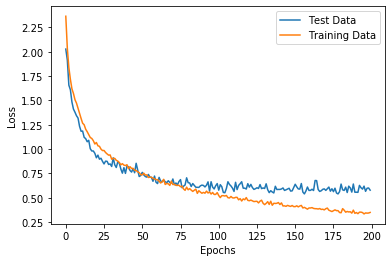

In [51]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['val_loss'], label='Test Data')
plt.plot(hist.history['loss'], label='Training Data')
plt.legend()
plt.savefig('e200_m3_loss.png')

In [ ]:
!find . -name "*\._*" -delete

In [ ]:
!find  'test1/Apple' -type f -name '\._*'  -delete

find: ‘test1/Apple’: No such file or directory


In [ ]:
model

NameError: ignored

In [ ]:
!ls

'Accuracy Graph.png'   outFolder.tar.gz		 weights00000025.h5
'Accuracy Loss.png'    sample_data		 weights00000050.h5
 Accuracy.png	       Validation_accuracy.png	 weights00000075.h5
 Loss.png	       Validation_Accuracy.png	 weights00000100.h5
 newData	       Validation_loss.png
 newData.tar.gz        Validation_Loss.png


In [ ]:
generator = test_datagen.flow_from_directory(
        'Dataset/prediction_generator/Apple',
        target_size=(128, 128),
        batch_size=1,
        class_mode=None,  # only data, no labels
        shuffle=False)  # keep data in same order as labels

probabilities = model.predict_generator(generator, 210)

Found 0 images belonging to 0 classes.


KeyboardInterrupt: ignored

In [ ]:
l=[i.argmax() for i in probabilities]

In [ ]:
count=0
for i in l:
  if(i!=0):
    count+=1
print(count)

9


In [ ]:
l

[0,
 0,
 0,
 15,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 15,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5]